In [6]:
pip install coppeliasim-zmqremoteapi-client

#### Importando as funções

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
from coppeliasim_zmqremoteapi_client import *

#### Remote API functions (Python)
Criação do cliente para conexão com a api remota

Link para repositório da SimZMQRemoteApi: https://github.com/CoppeliaRobotics/zmqRemoteApi/tree/master/clients/python

In [97]:
# create a client to connect to zmqRemoteApi server:
# (creation arguments can specify different host/port,
# defaults are host='localhost', port=23000)
client = RemoteAPIClient()

# get a remote object:
sim = client.require('sim')

# call API function fo test:
h = sim.getObject('/Floor')
print("Printando o chão: " + str(h))


Printando o chão: 13


### Transformações Homogêneas

Coordenadas homogêneas
Transformações rígidas -> Transformações lineares

Exp: Seja {B} um referencial rotacional theta = 30º em torno de ^Za e transladado 10 unidades em ^Xa e 5 unidades em ^Ya. Dado o ponto bP, defina abT e aP. "Temos o referencial {B} que tem uma certa rotação e um certo deslocamento em relação ao referencial A. Temos o ponto bP (3,7,0) descrito em relação a B.  Queremos a definição deste ponto em relação ao sistema de coordenadas A"

Resolução:
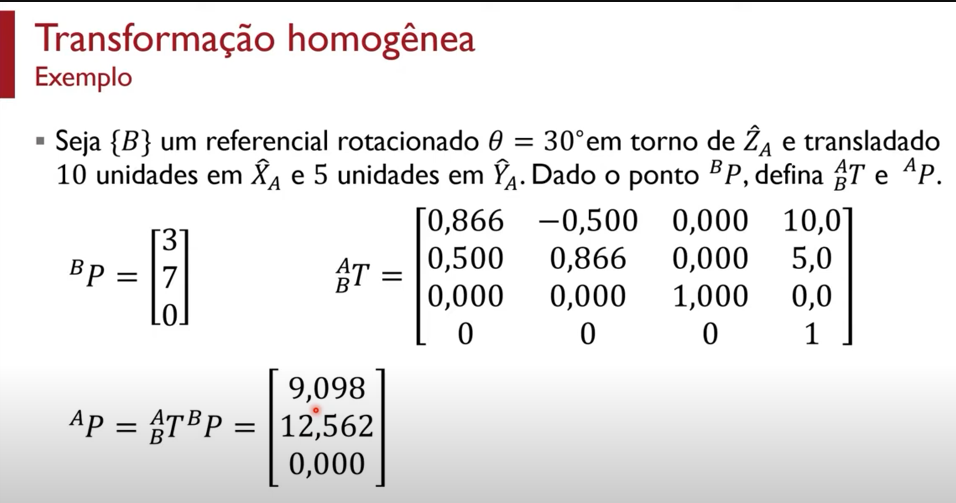

onde em bP, adicionamos um 1 em sua quarta posição no vetor para que seja possível multiplicar por abT.
bP = [3,7,0,1]

a na verdade é = aP = abT*bP = (9.098, 12.562, 0.000, 1) 

#### Funções auxiliares para plotagem

In [103]:
# Função para rotacionar em torno do eixo z
def Rz(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

# Função para plotar um referencial
def plot_frame(Porg, R, c=['r', 'g']):
    axis_size = 0.75   
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
        
    # X
    plt.quiver(*Porg[:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)

def plot_vector(a, b):
    # Extrair as coordenadas x e y dos pontos a e b
    x = [a[0], b[0]]
    y = [a[1], b[1]]

    # Plotar o vetor pontilhado
    plt.plot(x, y, linestyle='dotted', marker='o')

    # Definir limites dos eixos
    plt.xlim(min(a[0], b[0]) - 1, max(a[0], b[0]) + 1)
    plt.ylim(min(a[1], b[1]) - 1, max(a[1], b[1]) + 1)


#### Funções auxiliares para coleta de dados da API do CoppeliaSim

In [272]:
# Função para recuperar as posições dos objetos no cenário do CoppeliaSim
def get_object_position(sim, object_name):
    return sim.getObjectPosition(sim.getObject(object_name), -1)
# O mesmo para orientação
def get_object_orientation(sim, object_name):
    return sim.getObjectOrientation(sim.getObject(object_name), -1)

Posição de Robot no coppelia: [4.2048133597309345, -1.954943124164577, 0.13865557510710586]
Posição de Tree no coppelia: [-3.8999999999999995, -1.7250000000000005, 0.0]
Posição de IndoorPlant no coppelia: [-2.34999988079071, -0.20000005960464495, 0.16500011086463928]
Posição de Stairs no coppelia: [1.3999999949413178, 1.1022399231791487, 1.2385120391845703]
Posição de PersonOnToilet no coppelia: [2.8000000000000003, 1.7750000000000001, 0.4242924451828003]
Posição de Bookcase no coppelia: [6.150000022053695, -1.3250000154972923, 0.8550000190734863]
Orientação de Robot no coppelia: [0.0027313133202861314, -0.00014372977461942236, 1.5480873604102832]
Transformação de Robot para Robot:
TRR =
[[ 0.02270701 -0.99974216  0.          4.20481336]
 [ 0.99974216  0.02270701  0.         -1.95494312]
 [ 0.          0.          1.          0.13865558]
 [ 0.          0.          0.          1.        ]]

Transformação de Robot para Tree:
TRT =
[[ 1.     0.     0.    -3.9  ]
 [-0.     1.     0.    -1.

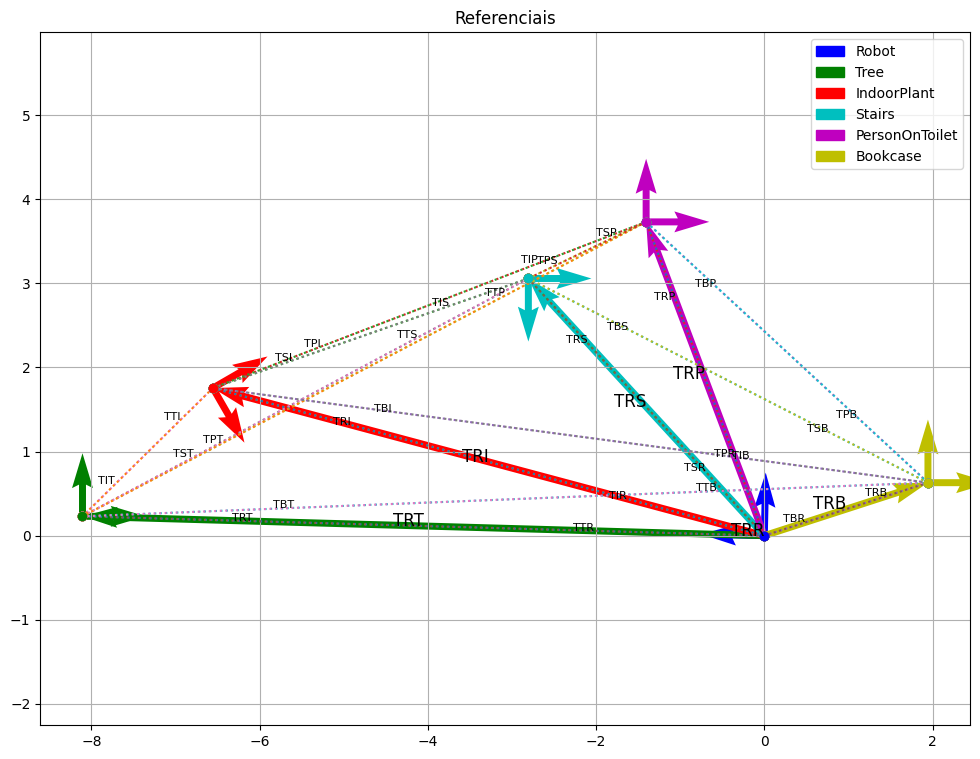

In [200]:
# Posições dos objetos diretamente do Coppelia
robot_position = get_object_position(sim, '/PioneerP3DX') # nosso referencial global | a
tree_position = get_object_position(sim, '/tree') # b
plant_position = get_object_position(sim, '/indoorPlant') # c
stairs_position = get_object_position(sim, '/stairs') # d
vase_position = get_object_position(sim, '/toilet') # e
rack_position = get_object_position(sim, '/rack') # f

# Printando as posições
print("Posição de Robot no coppelia: " + str(robot_position))
print("Posição de Tree no coppelia: " + str(tree_position))
print("Posição de IndoorPlant no coppelia: " + str(plant_position))
print("Posição de Stairs no coppelia: " + str(stairs_position))
print("Posição de PersonOnToilet no coppelia: " + str(vase_position))
print("Posição de Bookcase no coppelia: " + str(rack_position))

# Orientações dos objetos diretamente do Coppelia
robot_orientation = get_object_orientation(sim, '/PioneerP3DX') 
tree_orientation = get_object_orientation(sim, '/tree')
plant_orientation = get_object_orientation(sim, '/indoorPlant')
stairs_orientation = get_object_orientation(sim, '/stairs')
vase_orientation = get_object_orientation(sim, '/toilet')
rack_orientation = get_object_orientation(sim, '/rack')

print("Orientação de Robot no coppelia: " + str(robot_orientation))

# Posições e orientações dos pontos a até f (você precisa atribuir os valores corretos)
positions = {
    'Robot': robot_position,
    'Tree': tree_position,
    'IndoorPlant': plant_position,
    'Stairs': stairs_position,
    'PersonOnToilet': vase_position,
    'Bookcase': rack_position
}

rotations = {
    'Robot': Rz(robot_orientation[2]),  # Assume que a orientação é dada em relação ao eixo z
    'Tree': Rz(tree_orientation[2]),
    'IndoorPlant': Rz(plant_orientation[2]),
    'Stairs': Rz(stairs_orientation[2]),
    'PersonOnToilet': Rz(vase_orientation[2]),
    'Bookcase': Rz(rack_orientation[2])
}

# Cores correspondentes para cada ponto
point_colors = {
    'Robot': 'b',
    'Tree': 'g',
    'IndoorPlant': 'r',
    'Stairs': 'c',
    'PersonOnToilet': 'm',
    'Bookcase': 'y'
}

# Construindo as matrizes de transformação homogêneas para cada ponto em relação ao robô
transformations_rel_to_robot = {} # dicionário para armazenar as matrizes de transformação homogêneas de cada ponto em relação ao robô
for point, position in positions.items(): # para cada ponto e sua posição
    rotation = rotations[point] # obter a rotação do ponto
    transformation = np.eye(4) # criar uma matriz de transformação homogênea 4x4
    transformation[:3, :3] = rotation # atribuir a rotação à matriz de transformação
    transformation[:3, 3] = position # atribuir a posição à matriz de transformação
    transformations_rel_to_robot[point] = transformation # adicionar a matriz de transformação ao dicionário

# Exibindo as matrizes de transformação homogêneas para cada ponto
for point, transformation in transformations_rel_to_robot.items(): # para cada ponto e sua matriz de transformação
    print(f'Transformação de Robot para {point}:') 
    print(f'TR{point[0]} =') 
    print(transformation)
    print()

# Movendo os objetos de acordo com a posição do robô para representar o frame do robô como referencial
for point, transformation in transformations_rel_to_robot.items(): # para cada ponto e sua matriz de transformação
    position = transformation[:3, 3] # obter a posição do ponto
    position -= robot_position[:3] # subtrair a posição do robô para mover o ponto para a origem
    transformations_rel_to_robot[point][:3, 3] = position # atribuir a nova posição ao ponto

# Moendo o plot do robo para a origem
robot_position = [0, 0, 0, 1] 

# Plotando os referenciais
plt.figure(figsize=(12, 9))
for point, transformation in transformations_rel_to_robot.items():
    plot_frame(transformation[:2, 3], transformation[:2, :2], [point_colors[point], point_colors[point]]) 

# Plotando os vetores de transformação de um ponto para o outro e vetores de posição
for src_point, src_transformation in transformations_rel_to_robot.items(): # src = source
    for dst_point, dst_transformation in transformations_rel_to_robot.items(): # dst = destination
        if src_point != dst_point: # Se o ponto de origem for diferente do ponto de destino
            plot_vector(src_transformation[:2, 3], dst_transformation[:2, 3]) # Plotar o vetor de transformação
        else: # Se o ponto de origem for igual ao ponto de destino
            plt.quiver(*robot_position[:2], *(src_transformation[:2, 3] - robot_position[:2]), color=point_colors[src_point], angles='xy', scale_units='xy', scale=1) # Plotar o vetor de posição

# Plotando os pontos
for point, transformation in transformations_rel_to_robot.items():
    position = transformation[:3, 3]
    plt.plot(position[0], position[1], 'o', color=point_colors[point])

# Adicionando legendas para os vetores do referencial(robot) para os pontos
for point, transformation in transformations_rel_to_robot.items():
    position = transformation[:3, 3]
    delta = position - robot_position[:3] 
    middle_point = (position + robot_position[:3]) / 2
    plt.text(middle_point[0], middle_point[1], f'TR{point[0]}', fontsize=12, ha='right')
    #plt.text(position[0] - delta[0] * 0.1, position[1] - delta[1] * 0.1, f'TR{point[0]}', fontsize=12, ha='right')

# Adicionando legendas para os vetores de transformação de um ponto para outro
for src_point, src_transformation in transformations_rel_to_robot.items():
    for dst_point, dst_transformation in transformations_rel_to_robot.items():
        if src_point != dst_point:
            src_position = src_transformation[:3, 3]
            dst_position = dst_transformation[:3, 3]
            delta = dst_position - src_position
            plt.text(src_position[0] + delta[0]/4, src_position[1] + delta[1]/4, f'T{dst_point[0]}{src_point[0]}', fontsize=8, ha='right')
            #plt.text(middle_point[0], middle_point[1], f'P{dst_point[0]}org', fontsize=8, ha='right')
        else:
            print(src_point, dst_point)

# Criar objetos de patch para cada ponto e suas cores correspondentes
legend_patches = [mpatches.Patch(color=point_colors[point], label=point) for point in point_colors]

# Adicionar legenda usando os objetos de patch e os rótulos dos pontos
plt.legend(handles=legend_patches)

plt.title('Referenciais')
plt.grid(True)
plt.axis('equal')

plt.show() 

### Leitura do Laser Hokuyo

In [218]:
def readSensorData(clientId=-1, 
                    range_data_signal_id="hokuyo_range_data", 
                    angle_data_signal_id="hokuyo_angle_data"):

    # the first call should be non-blocking to avoid getting out-of-sync angle data
    string_range_data = sim.getStringSignal(range_data_signal_id)

    # the second call should block to avoid out-of-sync scenarios
    # between your python script and the simulator's main loop
    # (your script may be slower than the simulator's main loop, thus
    # slowing down data processing)
    string_angle_data = sim.getStringSignal(angle_data_signal_id)

    # check the if both data were obtained correctly
    if string_range_data is not None and string_angle_data is not None:
        # unpack data from range and sensor messages
        raw_range_data = sim.unpackFloatTable(string_range_data)
        raw_angle_data = sim.unpackFloatTable(string_angle_data)

        return raw_range_data, raw_angle_data

    # return none in case were nothing was gotten from the simulator
    return None

# Função para desenhar os dados do laser
def draw_laser_data(laser_data, max_sensor_range=5):
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    # for ang, dist in laser_data:
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        # Quando o feixe não acerta nada, retorna o valor máximo (definido na simulação)
        # Logo, usar um pequeno limiar do máximo para considerar a leitura
        if (max_sensor_range - dist) > 0.1:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            c = 'r'
            if ang < 0:    
                c = 'b'
            ax.plot(x, y, 'o', color=c)

    ax.plot(0, 0, 'k>', markersize=10)
        
    ax.grid()
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])


Connected to remote API server
Posição do laser em relação ao robô: [4.908664050786501, 1.262040018823572, 0.2886522128383636]
Posição do robô: [4.908445283628049, 1.2616966896785484, 0.1386527971194031]


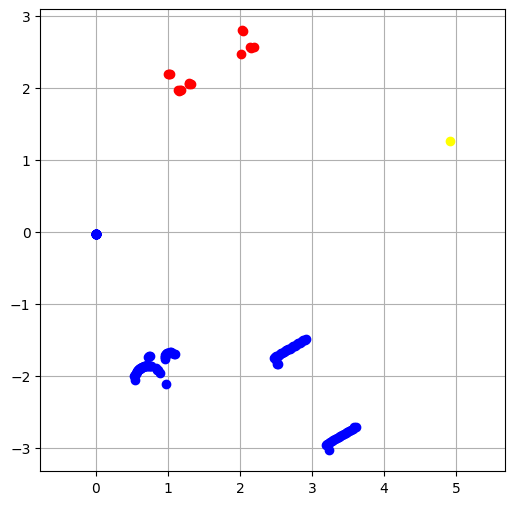

Program ended


In [248]:
# Função para desenhar os dados do laser
def draw_laser_data2(laser_data, laser_robot_position, max_sensor_range=5):
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    # for ang, dist in laser_data:
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        # Quando o feixe não acerta nada, retorna o valor máximo (definido na simulação)
        # Logo, usar um pequeno limiar do máximo para considerar a leitura
        if (max_sensor_range - dist) > 0.1:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            c = 'r'
            if ang < 0:    
                c = 'b'
            ax.plot(x, y, 'o', color=c)

    #ax.plot(0, 0, 'k>', markersize=10)
    ax.plot(laser_robot_position[0], laser_robot_position[1], 'o', color='yellow') # robô
        
    ax.grid()
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])

# Função para desenhar os dados do laser
def draw_laser_data3(laser_data, laser_robot_position, max_sensor_range=5):
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        # Quando o feixe não acerta nada, retorna o valor máximo (definido na simulação)
        # Logo, usar um pequeno limiar do máximo para considerar a leitura
        if (max_sensor_range - dist) > 0.1:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            c = 'r'
            if ang < 0:    
                c = 'b'
            ax.plot(x, y, 'o', color=c)

    # Plotar o robô
    ax.plot(laser_robot_position[0], laser_robot_position[1], 'o', color='yellow')
    ax.grid()
    plt.axis('equal')
    plt.show()

# Conectando-se ao CoppeliaSim
# Run a simulation in asynchronous mode:
clientID = sim.startSimulation()

if clientID != -1:
    print("Connected to remote API server")

    # Handle para o ROBÔ    
    laser_robot = sim.getObject('/Pioneer_p3dx')

    # Handle para as juntas das RODAS
    motorLeft=sim.getObject('/Pioneer_p3dx_leftMotor')
    motorRight=sim.getObject('/Pioneer_p3dx_rightMotor')

    # Matriz de transformação laser -> robô
    # Posição do laser em relação ao robô
    laser_position = get_object_position(sim, '/Pioneer_p3dx/fastHokuyo')
    print("Posição do laser em relação ao robô: " + str(laser_position))
    # Orientação do laser em relação ao robô
    laser_orientation = get_object_orientation(sim, '/Pioneer_p3dx/fastHokuyo')

    # Matriz de transformação homogênea do laser em relação ao robô
    T_laser_robot = np.eye(4)
    T_laser_robot[:3, 3] = laser_position
    T_laser_robot[:3, :3] = Rz(laser_orientation[2])

    # Posição do robô
    laser_robot_position = get_object_position(sim, '/Pioneer_p3dx')
    print("Posição do robô: " + str(laser_robot_position))
    # Orientação do robô
    laser_robot_orientation = get_object_orientation(sim, '/Pioneer_p3dx')

    # Matriz de transformação homogênea do robô
    T_robot = np.eye(4)
    T_robot[:3, 3] = laser_robot_position
    T_robot[:3, :3] = Rz(robot_orientation[2])

    # Definir matriz de transformação robô -> mundo
    # Matriz de transformação homogênea do robô em relação ao mundo
    #T_robot_world = np.eye(4)
    #T_robot_world[:3, 3] = laser_robot_position
    #T_robot_world[:3, :3] = Rz(laser_robot_orientation[2])

    # Handle para os dados do LASER
    laser_range_data = "hokuyo_range_data"
    laser_angle_data = "hokuyo_angle_data"

    # Prosseguindo com a leitura dos dados
    raw_range_data, raw_angle_data = readSensorData(clientID, laser_range_data, laser_angle_data)
    laser_data = np.array([raw_angle_data, raw_range_data]).T

    # Plotando os dados do sensor
    if laser_range_data is not None and laser_angle_data is not None:
        draw_laser_data3(laser_data, laser_robot_position)

else:
    print("Failed to connect to remote API server")
    print("Exiting...")

print("Program ended")


Connected to remote API server
Posição do laser em relação ao robô: [-1.6018648904765258, -1.1990670640319747, 0.28865541004627293]
Posição do robô: [-1.6022281280365074, -1.198947040740682, 0.1386559645999203]


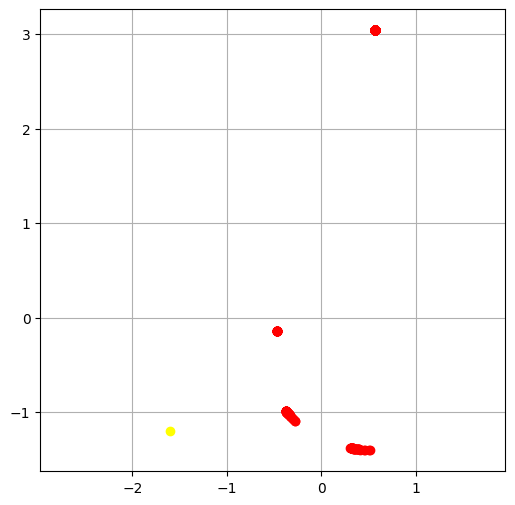

Program ended


In [253]:
# Função para desenhar os dados do laser
def draw_laser_data3(laser_data, laser_robot_position, max_sensor_range=5):
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        # Quando o feixe não acerta nada, retorna o valor máximo (definido na simulação)
        # Logo, usar um pequeno limiar do máximo para considerar a leitura
        if (max_sensor_range - dist) > 0.1:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            c = 'r'
            if ang < 0:    
                c = 'b'
            ax.plot(x, y, 'o', color=c)

    # Plotar o robô
    ax.plot(laser_robot_position[0], laser_robot_position[1], 'o', color='yellow')
    ax.grid()
    plt.axis('equal')
    plt.show()

    
# Conectando-se ao CoppeliaSim
# Run a simulation in asynchronous mode:
clientID = sim.startSimulation()

if clientID != -1:
    print("Connected to remote API server")

    # Handle para o ROBÔ    
    laser_robot = sim.getObject('/Pioneer_p3dx')

    # Handle para as juntas das RODAS
    motorLeft=sim.getObject('/Pioneer_p3dx_leftMotor')
    motorRight=sim.getObject('/Pioneer_p3dx_rightMotor')

    # Matriz de transformação laser -> robô
    # Posição do laser em relação ao robô
    laser_position = get_object_position(sim, '/Pioneer_p3dx/fastHokuyo')
    print("Posição do laser em relação ao robô: " + str(laser_position))
    # Orientação do laser em relação ao robô
    laser_orientation = get_object_orientation(sim, '/Pioneer_p3dx/fastHokuyo')

    # Matriz de transformação homogênea do laser em relação ao robô
    T_laser_robot = np.eye(4)
    T_laser_robot[:3, 3] = laser_position
    T_laser_robot[:3, :3] = Rz(laser_orientation[2])

    # Posição do robô
    laser_robot_position = get_object_position(sim, '/Pioneer_p3dx')
    print("Posição do robô: " + str(laser_robot_position))
    # Orientação do robô
    laser_robot_orientation = get_object_orientation(sim, '/Pioneer_p3dx')

    # Matriz de transformação robô → mundo
    T_RT_W = np.eye(4)
    T_RT_W[:3, 3] = laser_robot_position
    T_RT_W[:3, :3] = Rz(laser_robot_orientation[2])

    # Handle para os dados do LASER
    laser_range_data = "hokuyo_range_data"
    laser_angle_data = "hokuyo_angle_data"

    # Prosseguindo com a leitura dos dados
    raw_range_data, raw_angle_data = readSensorData(clientID, laser_range_data, laser_angle_data)
    if raw_range_data is not None and raw_angle_data is not None:
        laser_data = np.array([raw_angle_data, raw_range_data]).T

        # Transformando os pontos do laser para o referencial global
        laser_data_global = []
        for angle, distance in laser_data:
            laser_point_robot_frame = np.array([[distance], [0], [0], [1]])  # Ponto no referencial do robô
            laser_point_world_frame = np.dot(T_RT_W, np.dot(T_laser_robot, laser_point_robot_frame))  # Transformação para o referencial global
            x = laser_point_world_frame[0][0]
            y = laser_point_world_frame[1][0]
            laser_data_global.append([x, y])

        # Plotando os dados do sensor no referencial global
        draw_laser_data3(laser_data_global, laser_robot_position)

else:
    print("Failed to connect to remote API server")
    print("Exiting...")

print("Program ended")


#### Demonstrando sequência de posições ao longo da navegação. 

Connected to remote API server
Posição do laser em relação ao robô: [-6.396736346263932, 1.6252875716248194, 0.28864767737826946]


C:\Users\felip\AppData\Local\Temp\ipykernel_8264\225788220.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(6,6), dpi=100)


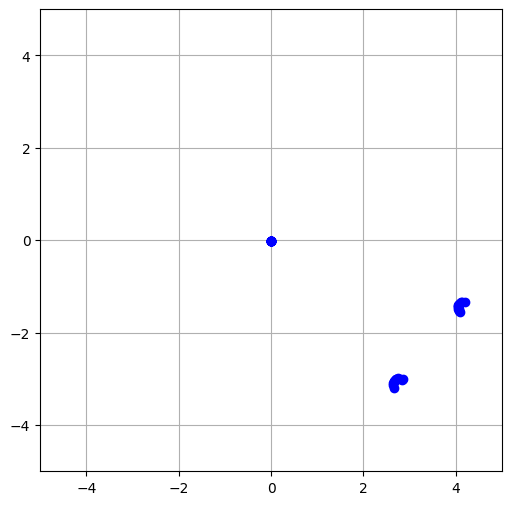

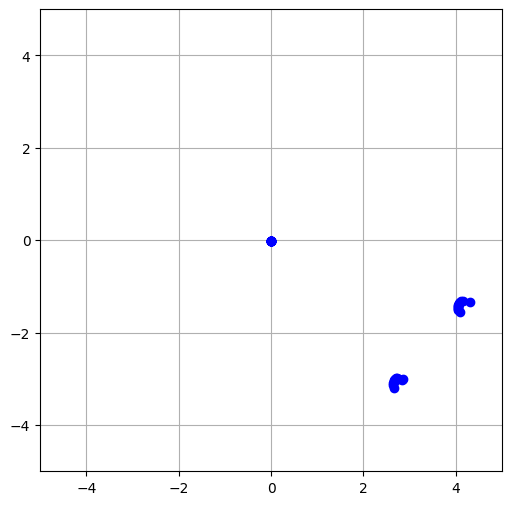

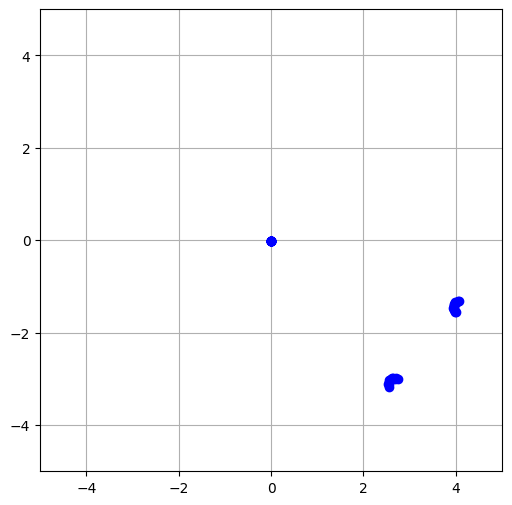

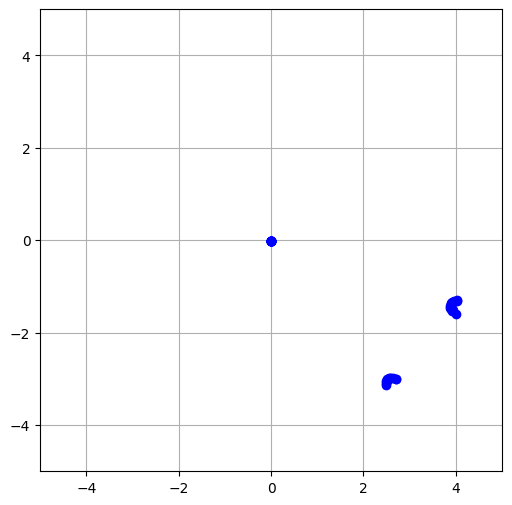

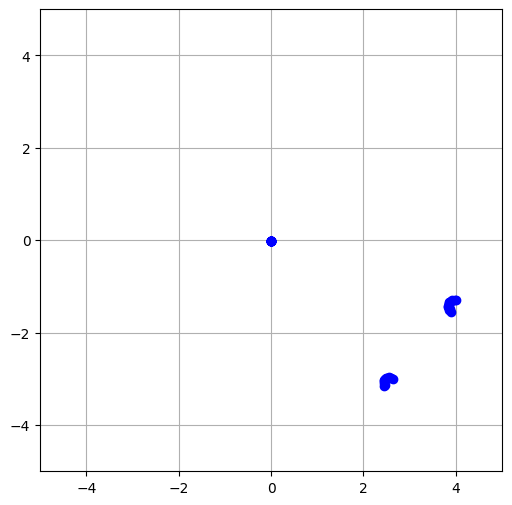

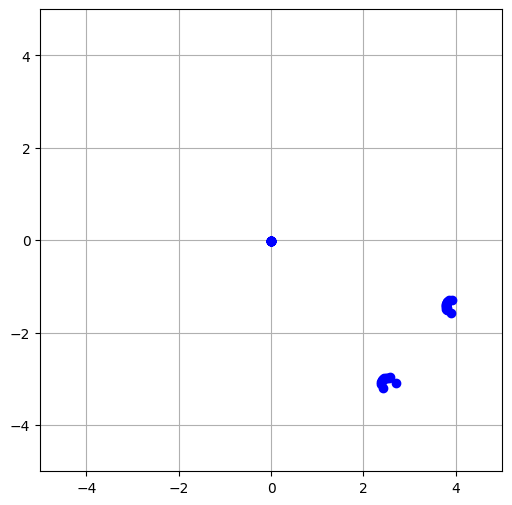

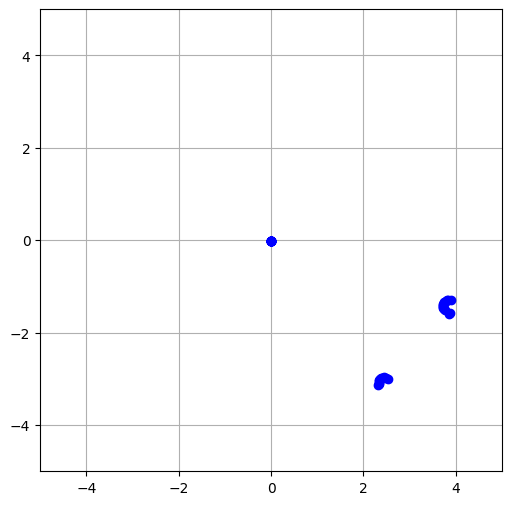

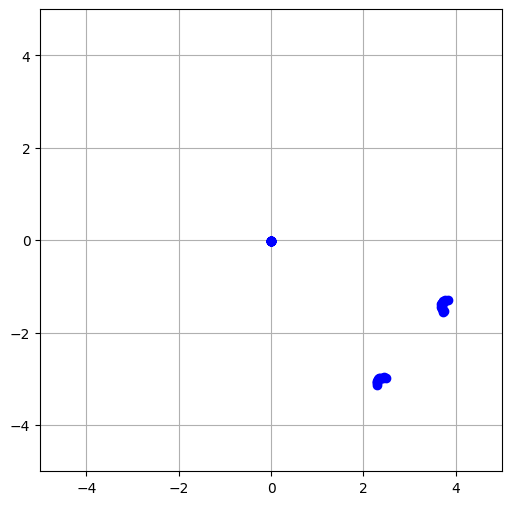

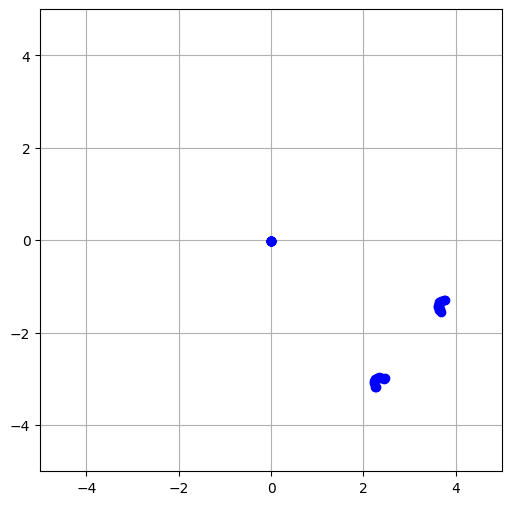

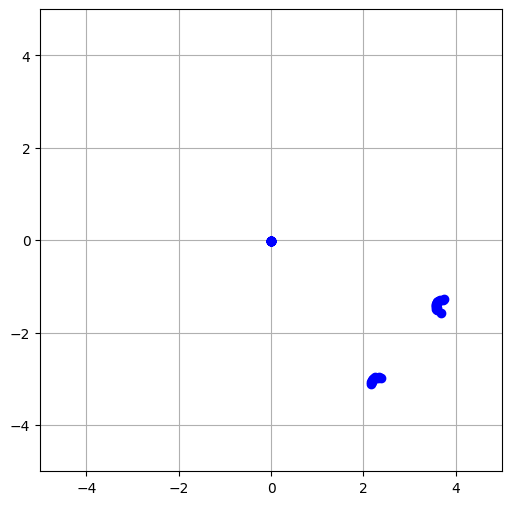

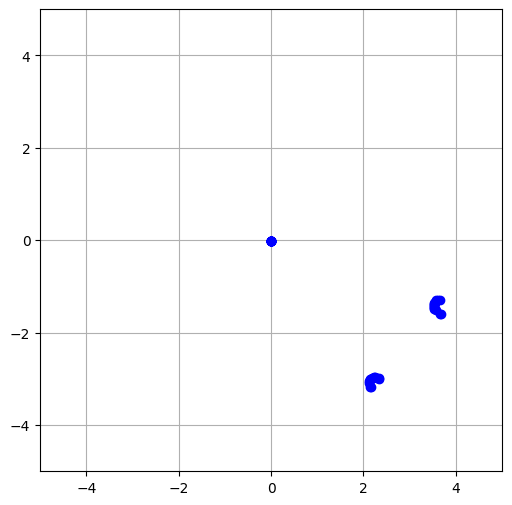

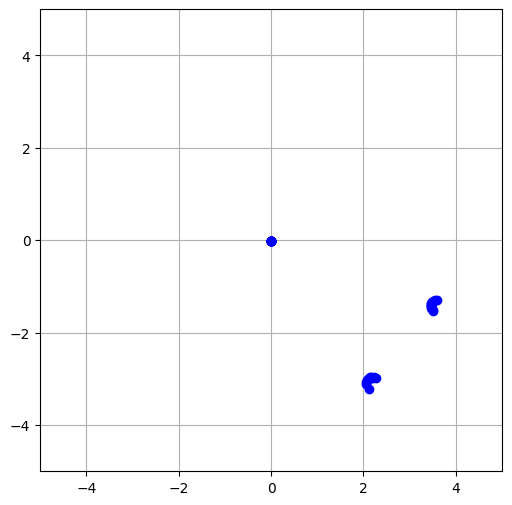

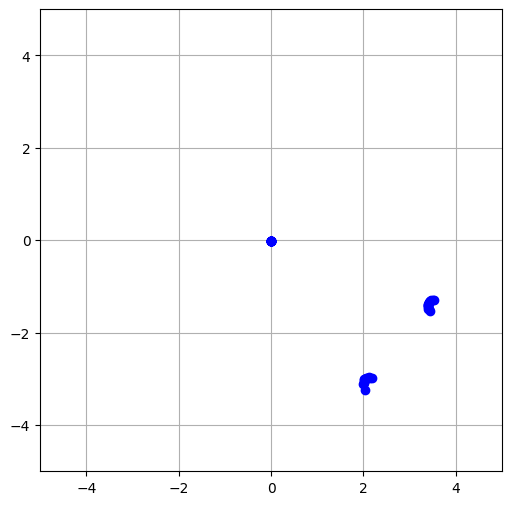

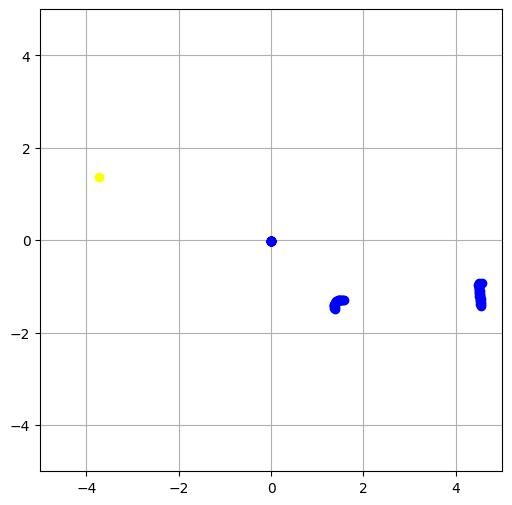

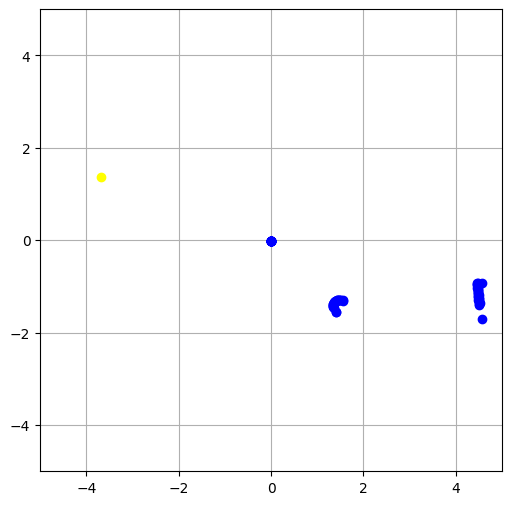

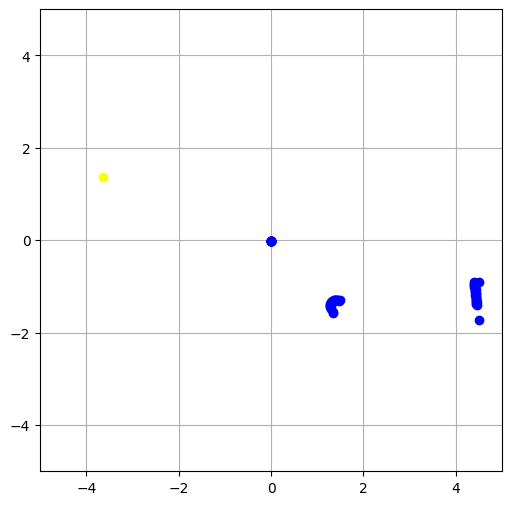

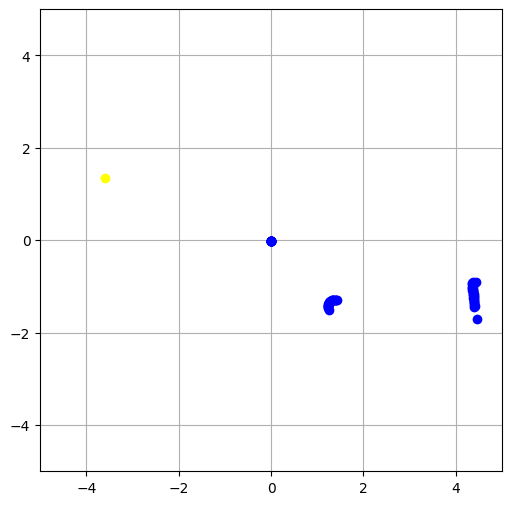

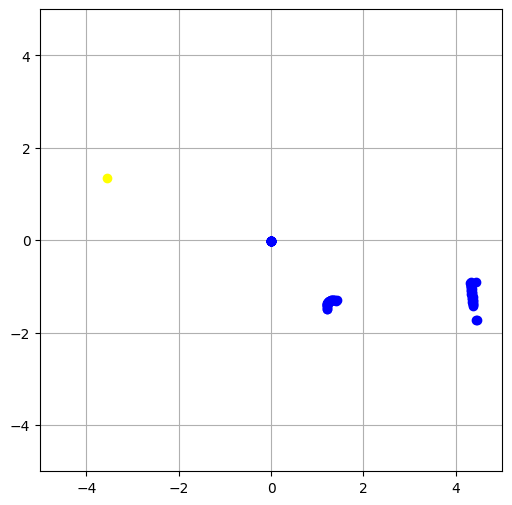

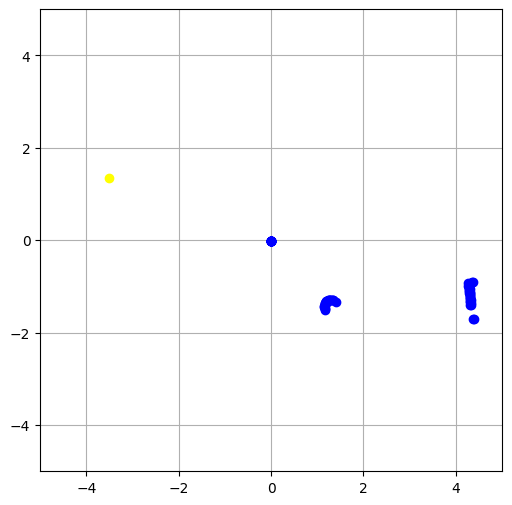

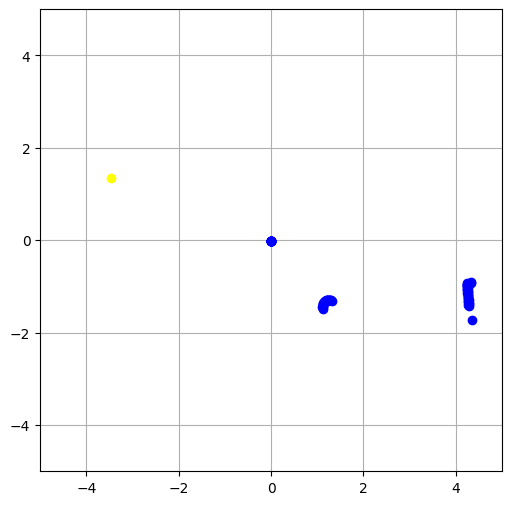

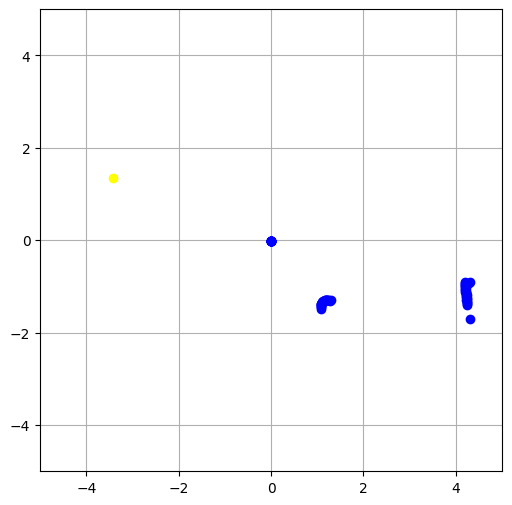

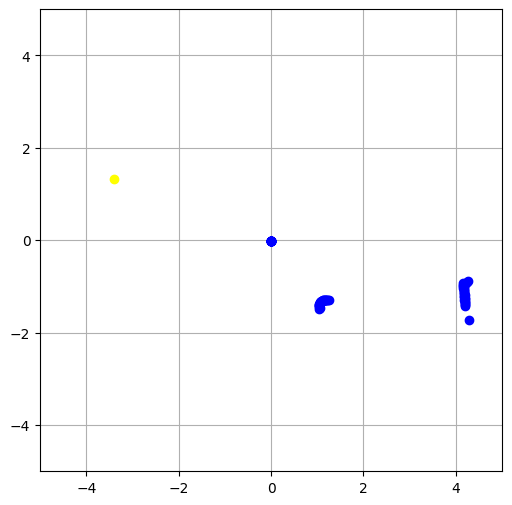

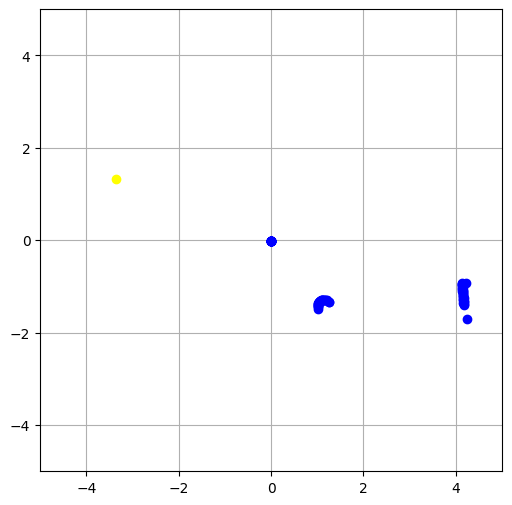

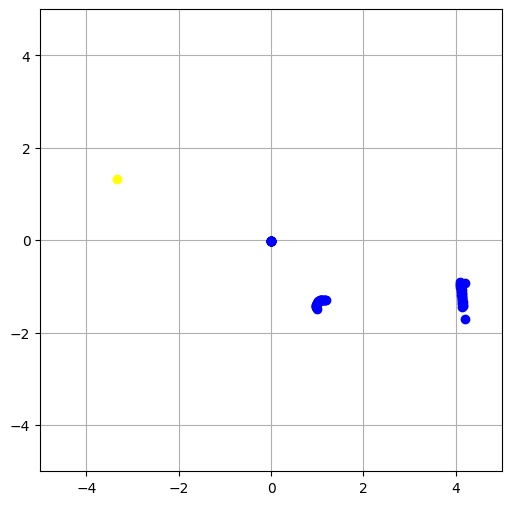

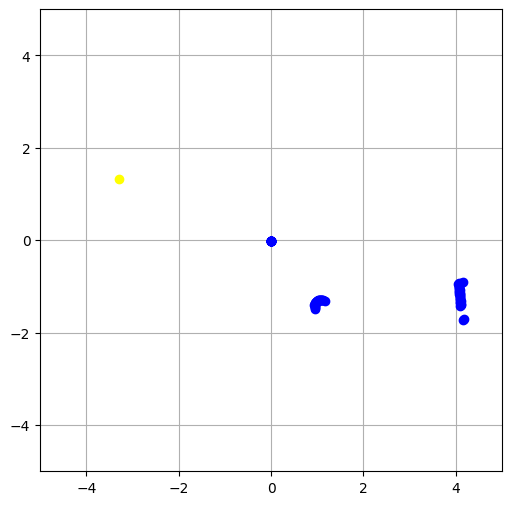

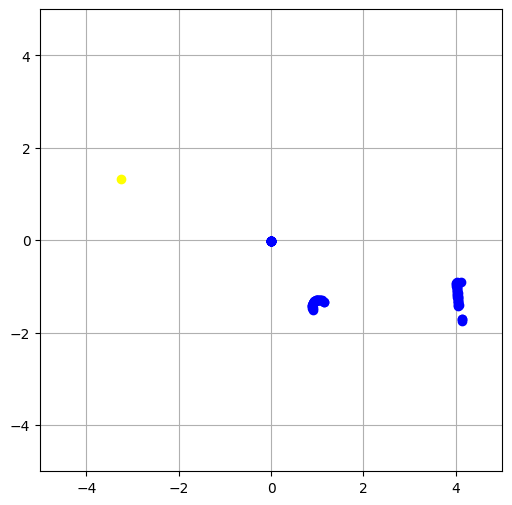

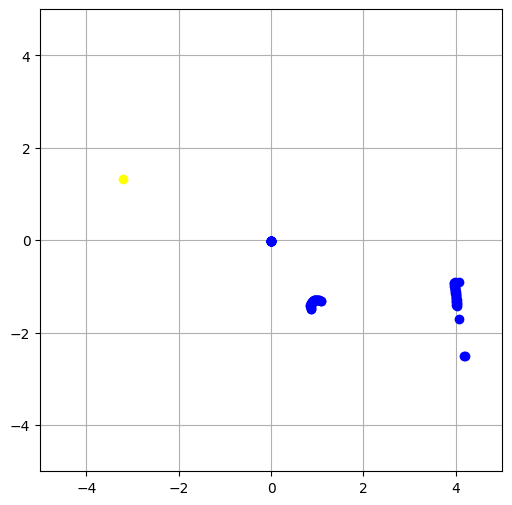

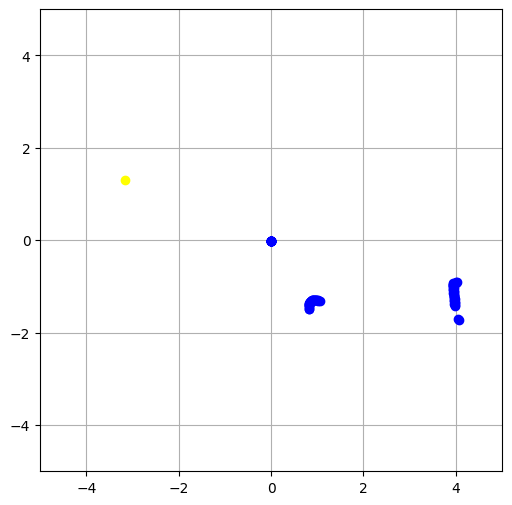

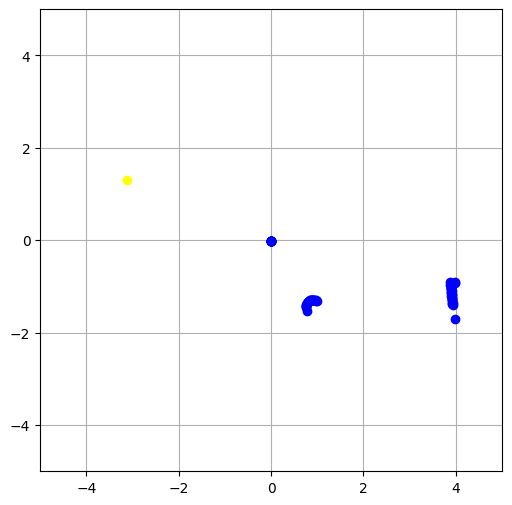

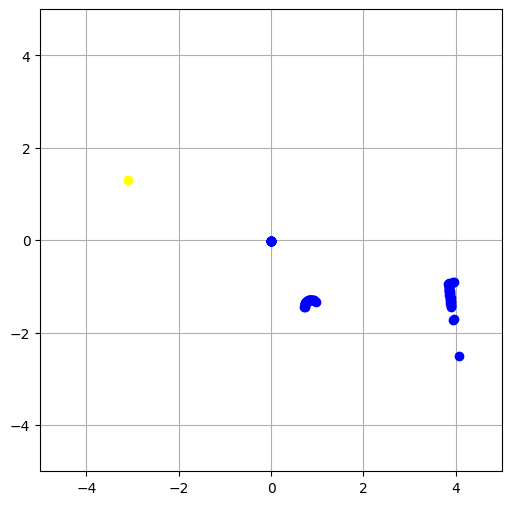

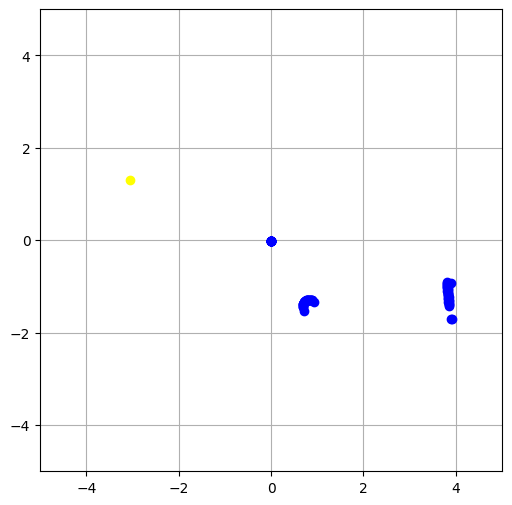

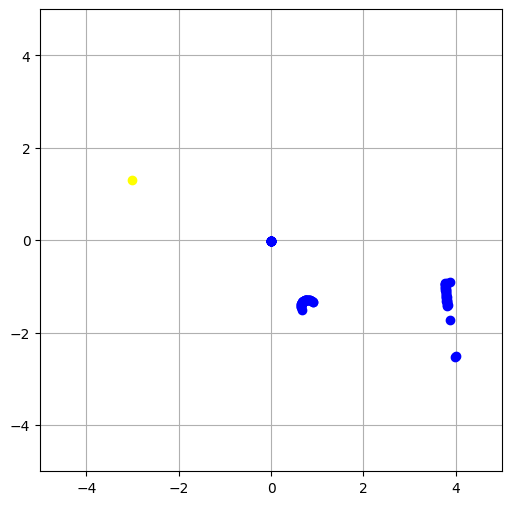

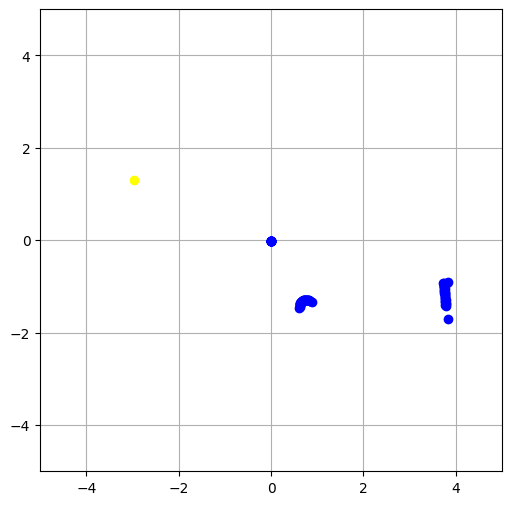

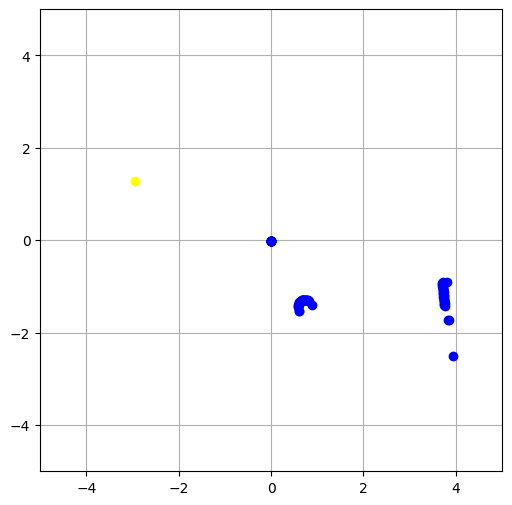

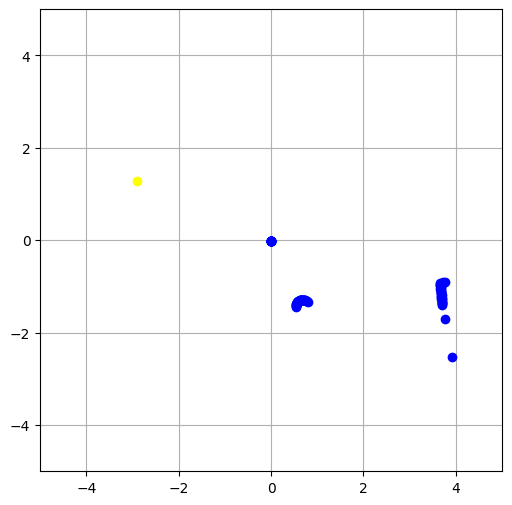

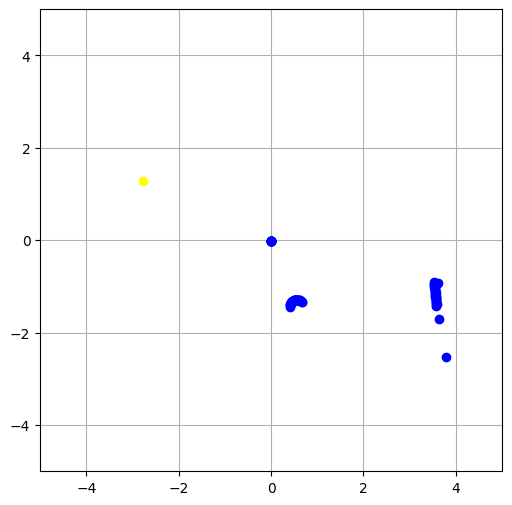

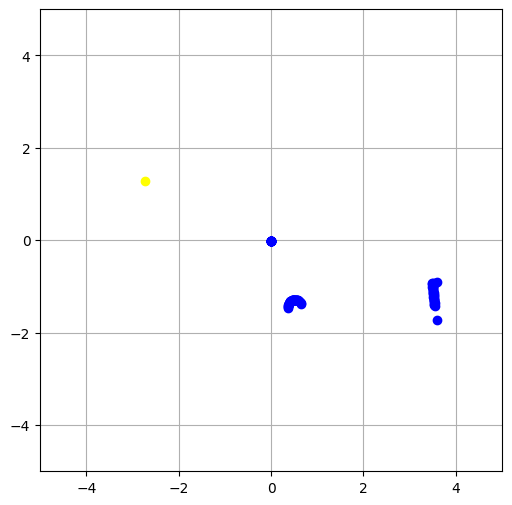

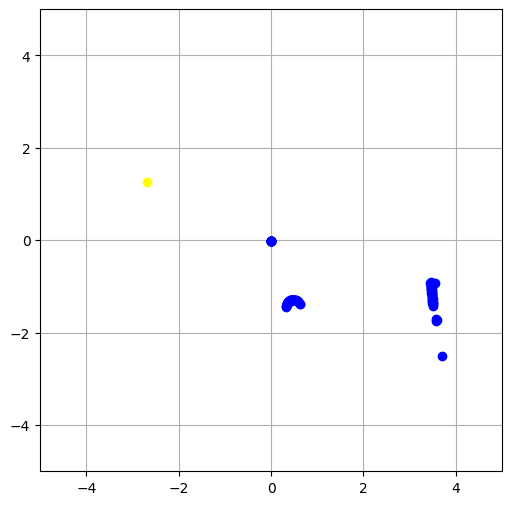

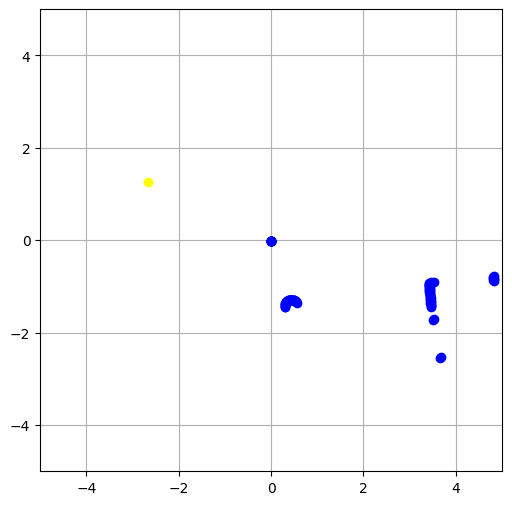

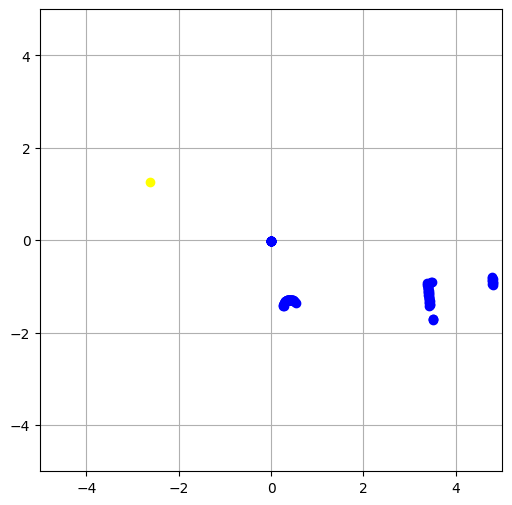

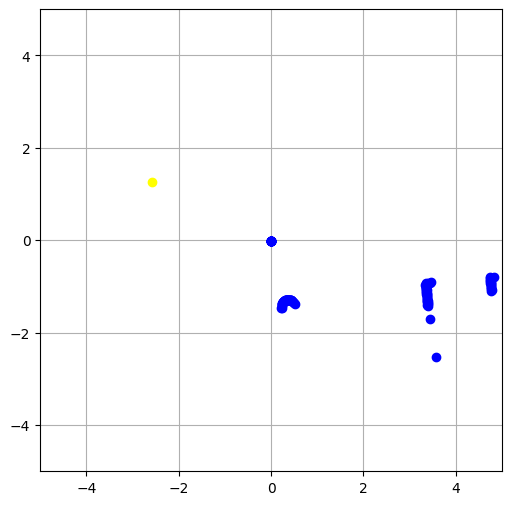

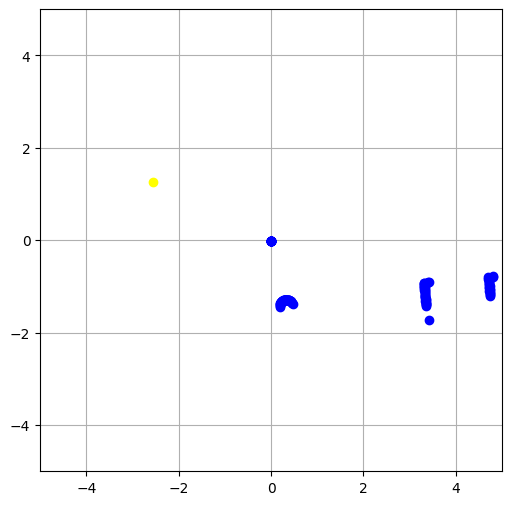

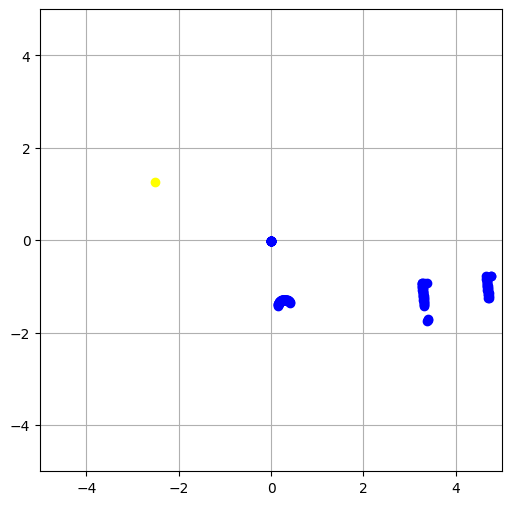

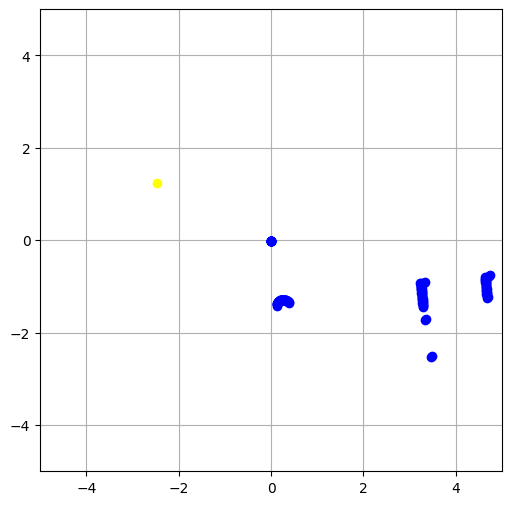

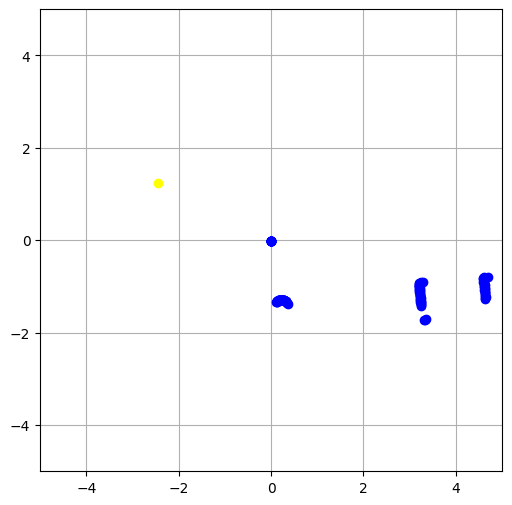

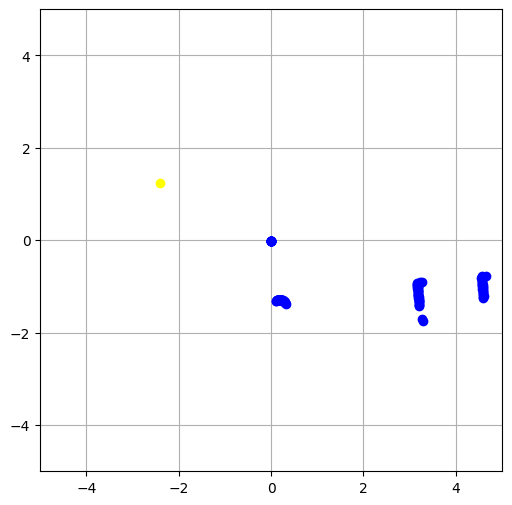

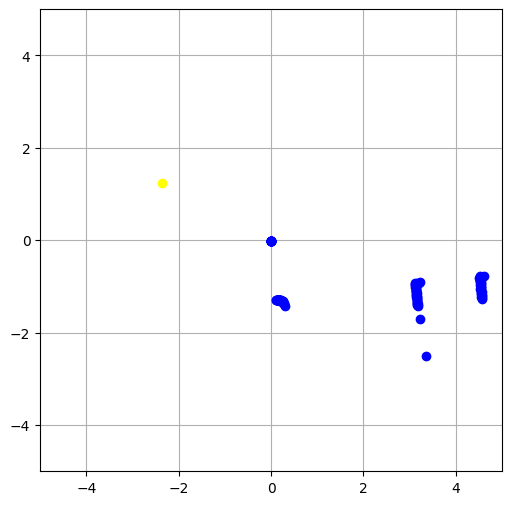

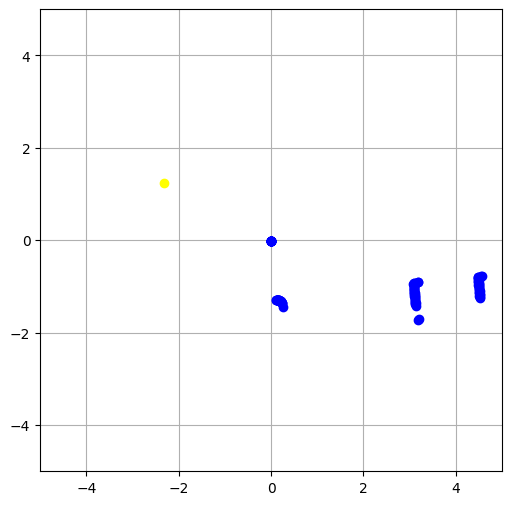

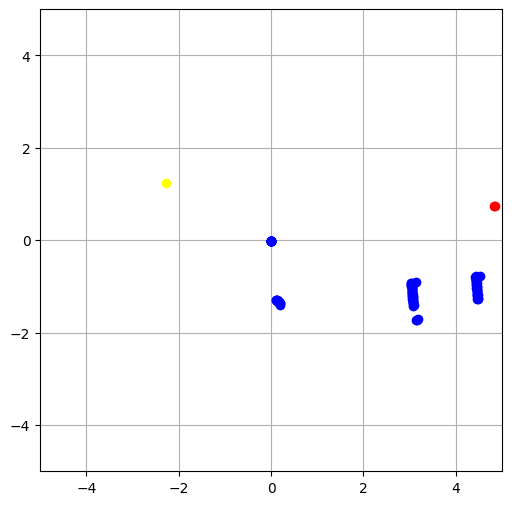

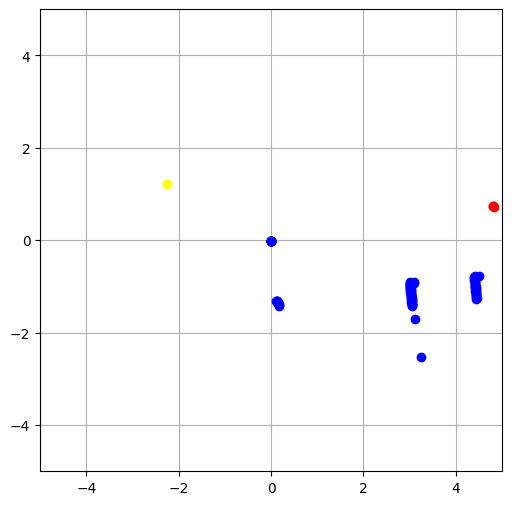

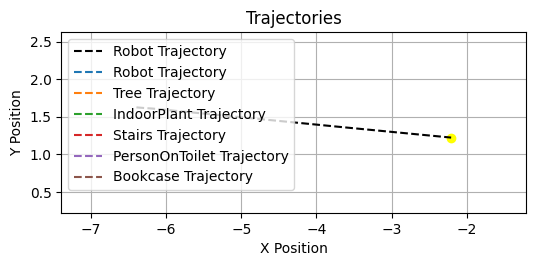

Program ended


In [277]:
# Função para desenhar os dados do laser
def draw_laser_data4(laser_data, laser_robot_position, max_sensor_range=5):
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    # for ang, dist in laser_data:
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        # Quando o feixe não acerta nada, retorna o valor máximo (definido na simulação)
        # Logo, usar um pequeno limiar do máximo para considerar a leitura
        if (max_sensor_range - dist) > 0.1:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            c = 'r'
            if ang < 0:    
                c = 'b'
            ax.plot(x, y, 'o', color=c)

    #ax.plot(0, 0, 'k>', markersize=10)
    ax.plot(laser_robot_position[0], laser_robot_position[1], 'o', color='yellow') # robô

# Conectando-se ao CoppeliaSim
# Run a simulation in asynchronous mode:
clientID = sim.startSimulation()

# Armazenar as posições do robô e de todos os pontos ao longo da navegação
robot_trajectory = []
points_trajectories = {point: [] for point in positions}  # Dicionário para armazenar as trajetórias de todos os pontos

if clientID != -1:
    print("Connected to remote API server")

    # Handle para o ROBÔ    
    laser_robot = sim.getObject('/Pioneer_p3dx')

    # Handle para as juntas das RODAS
    motorLeft = sim.getObject('/Pioneer_p3dx_leftMotor')
    motorRight = sim.getObject('/Pioneer_p3dx_rightMotor')

    # Matriz de transformação laser -> robô
    # Posição do laser em relação ao robô
    laser_position = get_object_position(sim, '/Pioneer_p3dx/fastHokuyo')
    print("Posição do laser em relação ao robô: " + str(laser_position))
    # Orientação do laser em relação ao robô
    laser_orientation = get_object_orientation(sim, '/Pioneer_p3dx/fastHokuyo')

    # Matriz de transformação homogênea do laser em relação ao robô
    T_laser_robot = np.eye(4)
    T_laser_robot[:3, 3] = laser_position
    T_laser_robot[:3, :3] = Rz(laser_orientation[2])

    # Handle para os dados do LASER
    laser_range_data = "hokuyo_range_data"
    laser_angle_data = "hokuyo_angle_data"

    # Armazenar a posição inicial do robô e dos pontos
    initial_robot_position = get_object_position(sim, '/Pioneer_p3dx')
    robot_trajectory.append(initial_robot_position)

    for point in positions:
        points_trajectories[point].append(positions[point])

    # Prosseguindo com a leitura dos dados
    raw_range_data, raw_angle_data = readSensorData(clientID, laser_range_data, laser_angle_data)
    laser_data = np.array([raw_angle_data, raw_range_data]).T

    # Plotando os dados do sensor
    if laser_range_data is not None and laser_angle_data is not None:
        # Plotar as leituras do laser
        draw_laser_data2(laser_data, initial_robot_position)

    # Navegação básica (exemplo)
    for _ in range(50):  # Exemplo de 10 passos de navegação
        # Realizar alguma ação de navegação aqui...
        # Por exemplo, mover o robô para frente por um determinado tempo
        sim.setJointTargetVelocity(motorLeft, 2)
        sim.setJointTargetVelocity(motorRight, 2)

        # Armazenar a posição atual do robô
        current_robot_position = get_object_position(sim, '/Pioneer_p3dx')
        robot_trajectory.append(current_robot_position)

        # Armazenar a posição atual dos pontos
        for point in positions:
            points_trajectories[point].append(positions[point])

        # Ler os dados do laser
        raw_range_data, raw_angle_data = readSensorData(clientID, laser_range_data, laser_angle_data)
        laser_data = np.array([raw_angle_data, raw_range_data]).T

        # Plotar as leituras do laser
        if laser_range_data is not None and laser_angle_data is not None:
            draw_laser_data2(laser_data, current_robot_position)

    # Plotar o caminho executado pelo robô
    robot_trajectory = np.array(robot_trajectory)
    plt.plot(robot_trajectory[:, 0], robot_trajectory[:, 1], linestyle='--', color='black', label='Robot Trajectory')

    # Plotar as trajetórias dos pontos
    for point in positions:
        points_trajectory = np.array(points_trajectories[point])
        plt.plot(points_trajectory[:, 0], points_trajectory[:, 1], linestyle='--', label=f'{point} Trajectory')

    # Armazenar os limites dos eixos com base na trajetória do robô
    x_min = np.min(robot_trajectory[:, 0])
    x_max = np.max(robot_trajectory[:, 0])
    y_min = np.min(robot_trajectory[:, 1])
    y_max = np.max(robot_trajectory[:, 1])

    # Adicionar margem aos limites dos eixos
    margin = 1.0
    plt.xlim([x_min - margin, x_max + margin])
    plt.ylim([y_min - margin, y_max + margin])

    # Adicionar legenda
    plt.legend()

    plt.grid(True)
    plt.title('Trajectories')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

else:
    print("Failed to connect to remote API server")
    print("Exiting...")

print("Program ended")
